## <프로젝트 기획>

### 역할 분배
배혜주 – DF 가공 및 정리, 시각화 메서드 탐색<br>
조재효 – DF 후처리 및 시각화 메서드 적용<br>
박주환 – 데이터셋 세팅 및 가공, DF 전처리<br>
전용우 – 데이터셋 탐색 및 시각화 메서드 탐색, 자료분석 및 정리

### 프로젝트 주제와 목적

Covid-19가 전세계 항공산업에 미친 영향 분석
- 여객, 화물 항공편의 증감을 Covid-19 전후로 비교해 보고, 의미있는 분석 시도

* 항공 데이터: https://www.airportal.go.kr/knowledge/statsnew/air/area.jsp
* Covid-19 확진자 데이터: https://covid19.who.int/table

- 10개국 (한국, 중국, 인도, 미국, 일본, 독일, 영국, 캐나다, 프랑스, 이탈리아)의 확진자 수와 항공 운항(여객, 화물) 수 비교<br>
- 2019, 2020, 2021의 항공 운항 수 비교
- 항공 운항 수의 변화에 따른 석유 소비량 비교

## <소스코드> 

### 1. 항공 데이터프레임 생성하기

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/Playdata/Documents/Numpy_Pandas/workshop/air_20/'
file_list = os.listdir(path)
df = pd.DataFrame()

for i in file_list:
    data = pd.read_excel(path + i, header=1, index_col=1).fillna(0)
    data['year'] = i[:4]
    data['month'] = i[5:7]
    df = pd.concat([df, data])
    print(i, 'done')

C:\Users\Playdata\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


2019.01.xlsx done
2019.02.xlsx done
2019.03.xlsx done
2019.04.xlsx done
2019.05.xlsx done
2019.06.xlsx done
2019.07.xlsx done
2019.08.xlsx done
2019.09.xlsx done
2019.10.xlsx done
2019.11.xlsx done
2019.12.xlsx done
2020.01.xlsx done
2020.02.xlsx done
2020.03.xlsx done
2020.04.xlsx done
2020.05.xlsx done
2020.06.xlsx done
2020.07.xlsx done
2020.08.xlsx done
2020.09.xlsx done
2020.10.xlsx done
2020.11.xlsx done
2020.12.xlsx done
2021.01.xlsx done
2021.02.xlsx done
2021.03.xlsx done
2021.04.xlsx done
2021.05.xlsx done
2021.06.xlsx done


In [3]:
air_df = df.groupby(['국가', 'year', 'month']).sum().loc[['한국', '중국', '인도', '미국', '일본', '독일', '영국', '프랑스', '캐나다', '이탈리아']]

In [4]:
air_df

운항(편)  여객(명)  화물(톤)
국가   year month                     
한국   2019 05         2      0    131
          07         4     80      1
          08         1    206      4
          09         3      0     57
          10         2      0     54
...                ...    ...    ...
이탈리아 2021 02        56      0   2711
          03        81      0   3849
          04        72      0   3460
          05        85      0   3851
          06        79      0   3522

[293 rows x 3 columns]

#### - index중 국가 영어로 바꾸기

In [5]:
air_df.rename(index = {'한국':'South Korea', '중국':'China', '인도':'India', '미국':'United States', '일본':'Japan', '독일':'Germany', '영국':'United Kingdom', '프랑스':'France', '캐나다':'Canada', '이탈리아':'Italy'}, inplace = True)

#### - index name 영어로 바꾸기

In [6]:
air_df.rename_axis(index = ['location', 'year', 'month'], inplace=True)

In [7]:
air_df

운항(편)  여객(명)  화물(톤)
location    year month                     
South Korea 2019 05         2      0    131
                 07         4     80      1
                 08         1    206      4
                 09         3      0     57
                 10         2      0     54
...                       ...    ...    ...
Italy       2021 02        56      0   2711
                 03        81      0   3849
                 04        72      0   3460
                 05        85      0   3851
                 06        79      0   3522

[293 rows x 3 columns]

### 2. 확진자 데이터프레임 생성하기 

In [8]:
cases = pd.read_csv('owid-covid-data.csv', index_col=2, encoding='utf8')
cases = cases.iloc[:, 2:5]
cases = cases.loc[['South Korea', 'China', 'India', 'United States', 'Japan', 'Germany', 'United Kingdom', 'France', 'Canada', 'Italy']]
cases['year'] = cases['date'].str[:4]
cases['month'] = cases['date'].str[5:7]

In [9]:
cases

,date,total_cases,new_cases,year,month
location,,,,,
South Korea,2020-01-21,NaN,NaN,2020,01
South Korea,2020-01-22,1.0,1.0,2020,01
South Korea,2020-01-23,1.0,0.0,2020,01
South Korea,2020-01-24,2.0,1.0,2020,01
South Korea,2020-01-25,2.0,0.0,2020,01
...,...,...,...,...,...
Italy,2021-07-28,4330739.0,5693.0,2021,07
Italy,2021-07-29,4336906.0,6167.0,2021,07
Italy,2021-07-30,4343519.0,6613.0,2021,07


In [10]:
cases['total_cases'].fillna(0, inplace = True)
cases = cases.groupby(['location', 'year', 'month'])
cases = cases.agg({'total_cases':'max', 'new_cases':'sum'})

In [11]:
cases

total_cases  new_cases
location      year month                        
Canada        2020 01             4.0        4.0
                   02            21.0       17.0
                   03          9246.0     9225.0
                   04         56716.0    47470.0
                   05         92488.0    35772.0
...                               ...        ...
United States 2021 04      32350861.0  1885745.0
                   05      33267592.0   916731.0
                   06      33664970.0   397378.0
                   07      34978276.0  1313306.0
                   08      35002148.0    23872.0

[200 rows x 2 columns]

### 3. 항공 데이터프레임과 확진자데이터 프레임 합치기

In [12]:
final_cases = cases.merge(air_df, how='outer', left_index=True, right_index=True)

In [13]:
final_cases.fillna(0, inplace=True)

In [14]:
final_cases

total_cases  new_cases   운항(편)    여객(명)    화물(톤)
location      year month                                                  
Canada        2019 01             0.0        0.0   222.0  56481.0   4461.0
                   02             0.0        0.0   199.0  48144.0   3847.0
                   03             0.0        0.0   221.0  54975.0   4146.0
                   04             0.0        0.0   244.0  58186.0   4332.0
                   05             0.0        0.0   249.0  63366.0   4695.0
...                               ...        ...     ...      ...      ...
United States 2021 04      32350861.0  1885745.0  3329.0  37776.0  68522.0
                   05      33267592.0   916731.0  3486.0  60140.0  75215.0
                   06      33664970.0   397378.0  3382.0  74034.0  73746.0
                   07      34978276.0  1313306.0     0.0      0.0      0.0
                   08      35002148.0    23872.0     0.0      0.0      0.0

[314 rows x 5 columns]

In [15]:
final_cases.loc['South Korea']

total_cases  new_cases  운항(편)    여객(명)  화물(톤)
year month                                               
2019 05             0.0        0.0    2.0      0.0  131.0
     07             0.0        0.0    4.0     80.0    1.0
     08             0.0        0.0    1.0    206.0    4.0
     09             0.0        0.0    3.0      0.0   57.0
     10             0.0        0.0    2.0      0.0   54.0
     12             0.0        0.0    1.0      0.0    0.0
2020 01            11.0       11.0    1.0      0.0    0.0
     02          3150.0     3139.0    0.0      0.0    0.0
     03          9786.0     6636.0    0.0      0.0    0.0
     04         10774.0      988.0    0.0      0.0    0.0
     05         11503.0      729.0    0.0      0.0    0.0
     06         12850.0     1347.0    0.0      0.0    0.0
     07         14336.0     1486.0    0.0      0.0    0.0
     08         20182.0     5846.0    0.0      0.0    0.0
     09         23889.0     3707.0    0.0      0.0    0.0
     10         26635.0     2746.0    2.0      0.0   59.0
     11         34652.0     8017.0    0.0      0.0    0.0
     12         61769.0    27117.0   24.0   2150.0   46.0
2021 01         78508.0    16739.0   35.0   3355.0    0.0
     02         90031.0    11523.0   50.0   5052.0    1.0
     03        103639.0    13608.0   44.0   5530.0    0.0
     04        122634.0    18995.0   38.0   4894.0    0.0
     05        140799.0    18165.0  117.0  11014.0   84.0
     06        157723.0    16924.0   48.0   5028.0    0.0
     07        199787.0    42064.0    0.0      0.0    0.0
     08        201002.0     1215.0    0.0      0.0    0.0

#### - South Korea의 경우 2019년 데이터 중 1, 2, 3, 4, 6, 11월 존재하지 않음, 이를 0으로 채우기 위해 unstack()을 해줌

In [16]:
final_cases.unstack()

total_cases                                      \
month                        01          02          03          04   
location       year                                                   
Canada         2019         0.0         0.0         0.0         0.0   
               2020         4.0        21.0      9246.0     56716.0   
               2021    783735.0    871243.0    989493.0   1229305.0   
China          2019         0.0         0.0         0.0         0.0   
               2020      9790.0     79261.0     81565.0     82919.0   
               2021     89611.0     89960.0     90265.0     90720.0   
France         2019         0.0         0.0         0.0         0.0   
               2020         5.0       100.0     52278.0    169098.0   
               2021   3255920.0   3815639.0   4705068.0   5677835.0   
Germany        2019         0.0         0.0         0.0         0.0   
               2020         5.0        79.0     71808.0    163009.0   
               2021   2225659.0   2450295.0   2843644.0   3405365.0   
India          2019         0.0         0.0         0.0         0.0   
               2020         1.0         3.0      1397.0     34863.0   
               2021  10757610.0  11112241.0  12221665.0  19164969.0   
Italy          2019         0.0         0.0         0.0         0.0   
               2020         2.0      1128.0    105792.0    205463.0   
               2021   2553032.0   2925265.0   3584899.0   4022653.0   
Japan          2019         0.0         0.0         0.0         0.0   
               2020        15.0       245.0      2255.0     14284.0   
               2021    390166.0    432090.0    474641.0    593264.0   
South Korea    2019         NaN         NaN         NaN         NaN   
               2020        11.0      3150.0      9786.0     10774.0   
               2021     78508.0     90031.0    103639.0    122634.0   
United Kingdom 2019         0.0         0.0         0.0         0.0   
               2020         2.0        61.0     38815.0    178771.0   
               2021   3828187.0   4188827.0   4359982.0   4432246.0   
United States  2019         0.0         0.0         0.0         0.0   
               2020         8.0        25.0    192301.0   1081105.0   
               2021  26249342.0  28651438.0  30465116.0  32350861.0   

                                                                     \
month                        05          06          07          08   
location       year                                                   
Canada         2019         0.0         0.0         0.0         0.0   
               2020     92488.0    106029.0    118297.0    130849.0   
               2021   1389814.0   1423170.0   1438457.0   1438817.0   
China          2019         0.0         0.0         0.0         0.0   
               2020     83062.0     83580.0     84383.0     85104.0   
               2021     91173.0     91846.0     93066.0     93162.0   
France         2019         0.0         0.0         0.0         0.0   
               2020    190975.0    204244.0    227239.0    321160.0   
               2021   5978650.0   5837265.0   6190334.0   6209934.0   
Germany        2019         0.0         0.0         0.0         0.0   
               2020    183410.0    195418.0    210399.0    244802.0   
               2021   3689921.0   3736205.0   3777236.0   3778277.0   
India          2019         0.0         0.0         0.0         0.0   
               2020    190609.0    585481.0   1695988.0   3691166.0   
               2021  28175044.0  30411634.0  31655824.0  31655824.0   
Italy          2019         0.0         0.0         0.0         0.0   
               2020    232997.0    240578.0    247537.0    269214.0   
               2021   4217821.0   4259909.0   4350028.0   4355348.0   
Japan          2019         0.0         0.0         0.0         0.0   
               2020     16751.0     18615.0     36234.0     68396.0   
               2021    747188.0    800305.0

In [17]:
df = pd.DataFrame(final_cases.unstack()).fillna(0).stack()

In [18]:
df.loc['South Korea']

total_cases  new_cases  운항(편)    여객(명)  화물(톤)
year month                                               
2019 01             0.0        0.0    0.0      0.0    0.0
     02             0.0        0.0    0.0      0.0    0.0
     03             0.0        0.0    0.0      0.0    0.0
     04             0.0        0.0    0.0      0.0    0.0
     05             0.0        0.0    2.0      0.0  131.0
     06             0.0        0.0    0.0      0.0    0.0
     07             0.0        0.0    4.0     80.0    1.0
     08             0.0        0.0    1.0    206.0    4.0
     09             0.0        0.0    3.0      0.0   57.0
     10             0.0        0.0    2.0      0.0   54.0
     11             0.0        0.0    0.0      0.0    0.0
     12             0.0        0.0    1.0      0.0    0.0
2020 01            11.0       11.0    1.0      0.0    0.0
     02          3150.0     3139.0    0.0      0.0    0.0
     03          9786.0     6636.0    0.0      0.0    0.0
     04         10774.0      988.0    0.0      0.0    0.0
     05         11503.0      729.0    0.0      0.0    0.0
     06         12850.0     1347.0    0.0      0.0    0.0
     07         14336.0     1486.0    0.0      0.0    0.0
     08         20182.0     5846.0    0.0      0.0    0.0
     09         23889.0     3707.0    0.0      0.0    0.0
     10         26635.0     2746.0    2.0      0.0   59.0
     11         34652.0     8017.0    0.0      0.0    0.0
     12         61769.0    27117.0   24.0   2150.0   46.0
2021 01         78508.0    16739.0   35.0   3355.0    0.0
     02         90031.0    11523.0   50.0   5052.0    1.0
     03        103639.0    13608.0   44.0   5530.0    0.0
     04        122634.0    18995.0   38.0   4894.0    0.0
     05        140799.0    18165.0  117.0  11014.0   84.0
     06        157723.0    16924.0   48.0   5028.0    0.0
     07        199787.0    42064.0    0.0      0.0    0.0
     08        201002.0     1215.0    0.0      0.0    0.0
     09             0.0        0.0    0.0      0.0    0.0
     10             0.0        0.0    0.0      0.0    0.0
     11             0.0        0.0    0.0      0.0    0.0
     12             0.0        0.0    0.0      0.0    0.0

In [19]:
df.shape # 10개국 * 3년 * 12개월

(360, 5)

#### - 시각화를 위해 인덱스를 컬럼으로 옮겨줌

In [20]:
df = df.reset_index()
df

,location,year,month,total_cases,new_cases,운항(편),여객(명),화물(톤)
0,Canada,2019,01,0.0,0.0,222.0,56481.0,4461.0
1,Canada,2019,02,0.0,0.0,199.0,48144.0,3847.0
2,Canada,2019,03,0.0,0.0,221.0,54975.0,4146.0
3,Canada,2019,04,0.0,0.0,244.0,58186.0,4332.0
4,Canada,2019,05,0.0,0.0,249.0,63366.0,4695.0
...,...,...,...,...,...,...,...,...
355,United States,2021,08,35002148.0,23872.0,0.0,0.0,0.0
356,United States,2021,09,0.0,0.0,0.0,0.0,0.0
357,United States,2021,10,0.0,0.0,0.0,0.0,0.0
358,United States,2021,11,0.0,0.0,0.0,0.0,0.0


### 4. 시각화

#### - 2020년 전세계의 확진자, 항공 여객 수, 화물량 비교

In [21]:
monthly_df = df[df['year'] == '2020']

In [22]:
monthly_df

,location,year,month,total_cases,new_cases,운항(편),여객(명),화물(톤)
12,Canada,2020,01,4.0,4.0,222.0,56210.0,4285.0
13,Canada,2020,02,21.0,17.0,206.0,50569.0,3539.0
14,Canada,2020,03,9246.0,9225.0,140.0,20594.0,2760.0
15,Canada,2020,04,56716.0,47470.0,24.0,1667.0,1489.0
16,Canada,2020,05,92488.0,35772.0,45.0,5010.0,2019.0
...,...,...,...,...,...,...,...,...
343,United States,2020,08,6026946.0,1459482.0,2646.0,68212.0,55963.0
344,United States,2020,09,7235498.0,1208552.0,2678.0,46096.0,57417.0
345,United States,2020,10,9165786.0,1930288.0,2867.0,43582.0,62205.0
346,United States,2020,11,13670698.0,4504912.0,3009.0,43815.0,60339.0


In [23]:
tmp_df = monthly_df.groupby('month').sum()

In [24]:
tmp_df

,total_cases,new_cases,운항(편),여객(명),화물(톤)
month,,,,,
01,9843.0,9292.0,22570.0,3469095.0,171518.0
02,84073.0,74230.0,14664.0,1726343.0,150462.0
03,565243.0,481170.0,6379.0,338716.0,151745.0
04,1997002.0,1431522.0,4249.0,77777.0,137736.0
05,3058127.0,1061362.0,5335.0,82157.0,140737.0
06,4374244.0,1316117.0,4993.0,105716.0,135457.0
07,7506670.0,3132426.0,5253.0,125292.0,144923.0
08,11195902.0,3689232.0,5425.0,144892.0,140978.0
09,15573271.0,4377369.0,5842.0,118701.0,151871.0


In [25]:
tmp_df = tmp_df.reset_index()
tmp_df

,month,total_cases,new_cases,운항(편),여객(명),화물(톤)
0,01,9843.0,9292.0,22570.0,3469095.0,171518.0
1,02,84073.0,74230.0,14664.0,1726343.0,150462.0
2,03,565243.0,481170.0,6379.0,338716.0,151745.0
3,04,1997002.0,1431522.0,4249.0,77777.0,137736.0
4,05,3058127.0,1061362.0,5335.0,82157.0,140737.0
5,06,4374244.0,1316117.0,4993.0,105716.0,135457.0
6,07,7506670.0,3132426.0,5253.0,125292.0,144923.0
7,08,11195902.0,3689232.0,5425.0,144892.0,140978.0
8,09,15573271.0,4377369.0,5842.0,118701.0,151871.0
9,10,21442443.0,5869172.0,5989.0,115188.0,158860.0


In [26]:
tmp_df.corr()

,total_cases,new_cases,운항(편),여객(명),화물(톤)
total_cases,1.000000,0.990173,-0.300457,-0.384623,0.494803
new_cases,0.990173,1.000000,-0.361134,-0.439911,0.441079
운항(편),-0.300457,-0.361134,1.000000,0.993053,0.588894
여객(명),-0.384623,-0.439911,0.993053,1.000000,0.522891
화물(톤),0.494803,0.441079,0.588894,0.522891,1.000000


#### - 아래의 그래프를 보면 확진자의 수가 증가할 수록 여객 수가 줄어드는 것을 볼 수 있다. 
#### - 화물의 경우 일부 영향을 받은 기간이 있지만 바로 증가하는 것을 볼 수 있다.

<AxesSubplot:xlabel='month', ylabel='화물(톤)'>

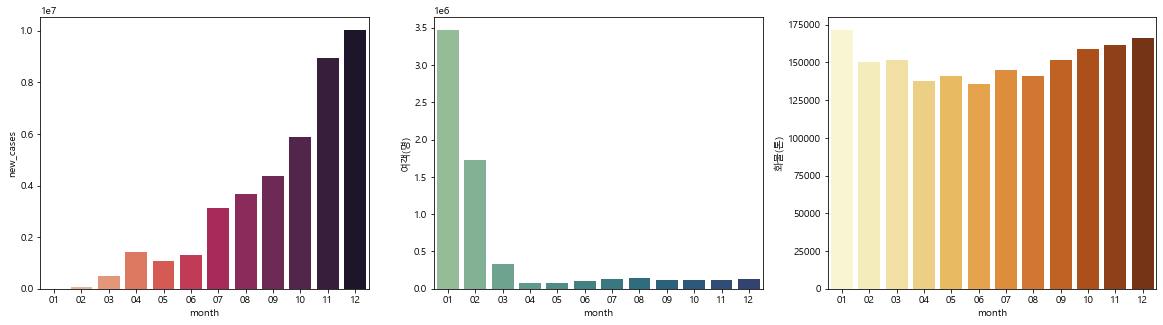

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

sns.barplot(data=tmp_df, x="month", y="new_cases",  ax=axes[0], palette='rocket_r')
sns.barplot(data=tmp_df, x="month", y="여객(명)",  ax=axes[1], palette='crest')
sns.barplot(data=tmp_df, x="month", y="화물(톤)",  ax=axes[2], palette='YlOrBr')

#### - 위 데이터의 분포를 나타내었다.

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<AxesSubplot:xlabel='화물(톤)', ylabel='Density'>

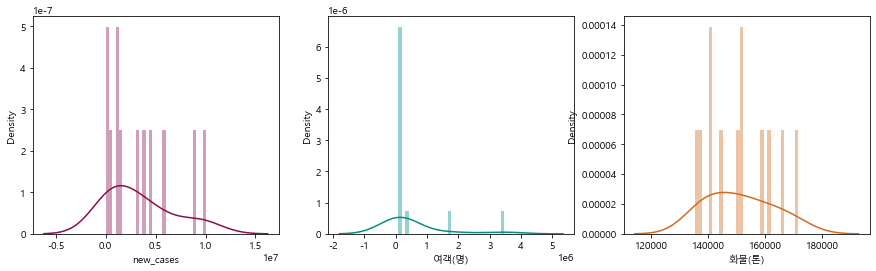

In [33]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

sns.distplot(tmp_df['new_cases'], bins=30, color='#880E4F',  ax=axes[0])
sns.distplot(tmp_df['여객(명)'], bins=30, color='#008C8C',  ax=axes[1])
sns.distplot(tmp_df['화물(톤)'], bins=30, color='#D2691E',  ax=axes[2])

#### - 2020, 2021년 10개국의 확진자 수 시각화하기

In [29]:
new_df = df.groupby(['year']) # 2019, 2020, 2021

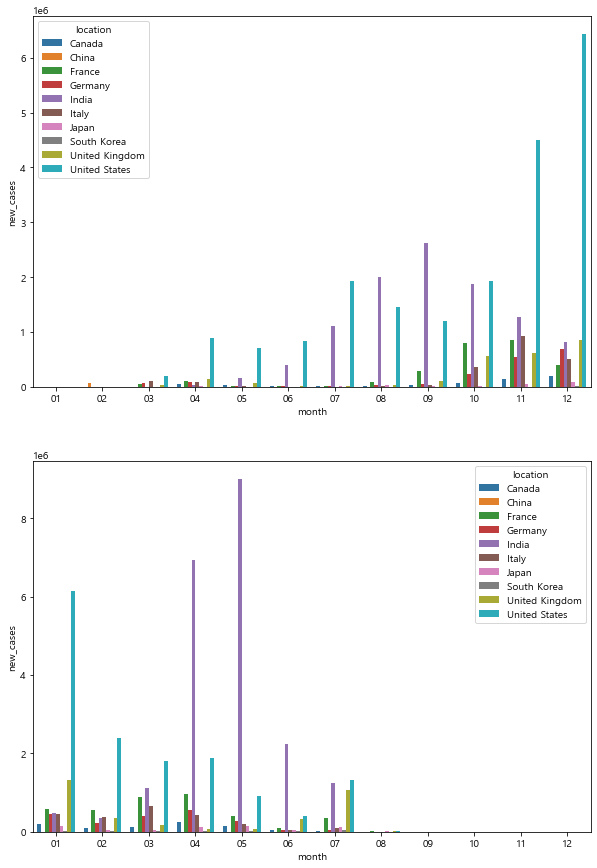

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
i = 0
for key, group in new_df:
    if i >= 1:
        sns.barplot(data=group,x='month',y='new_cases',hue='location', ax=axes[i-1])
    i += 1

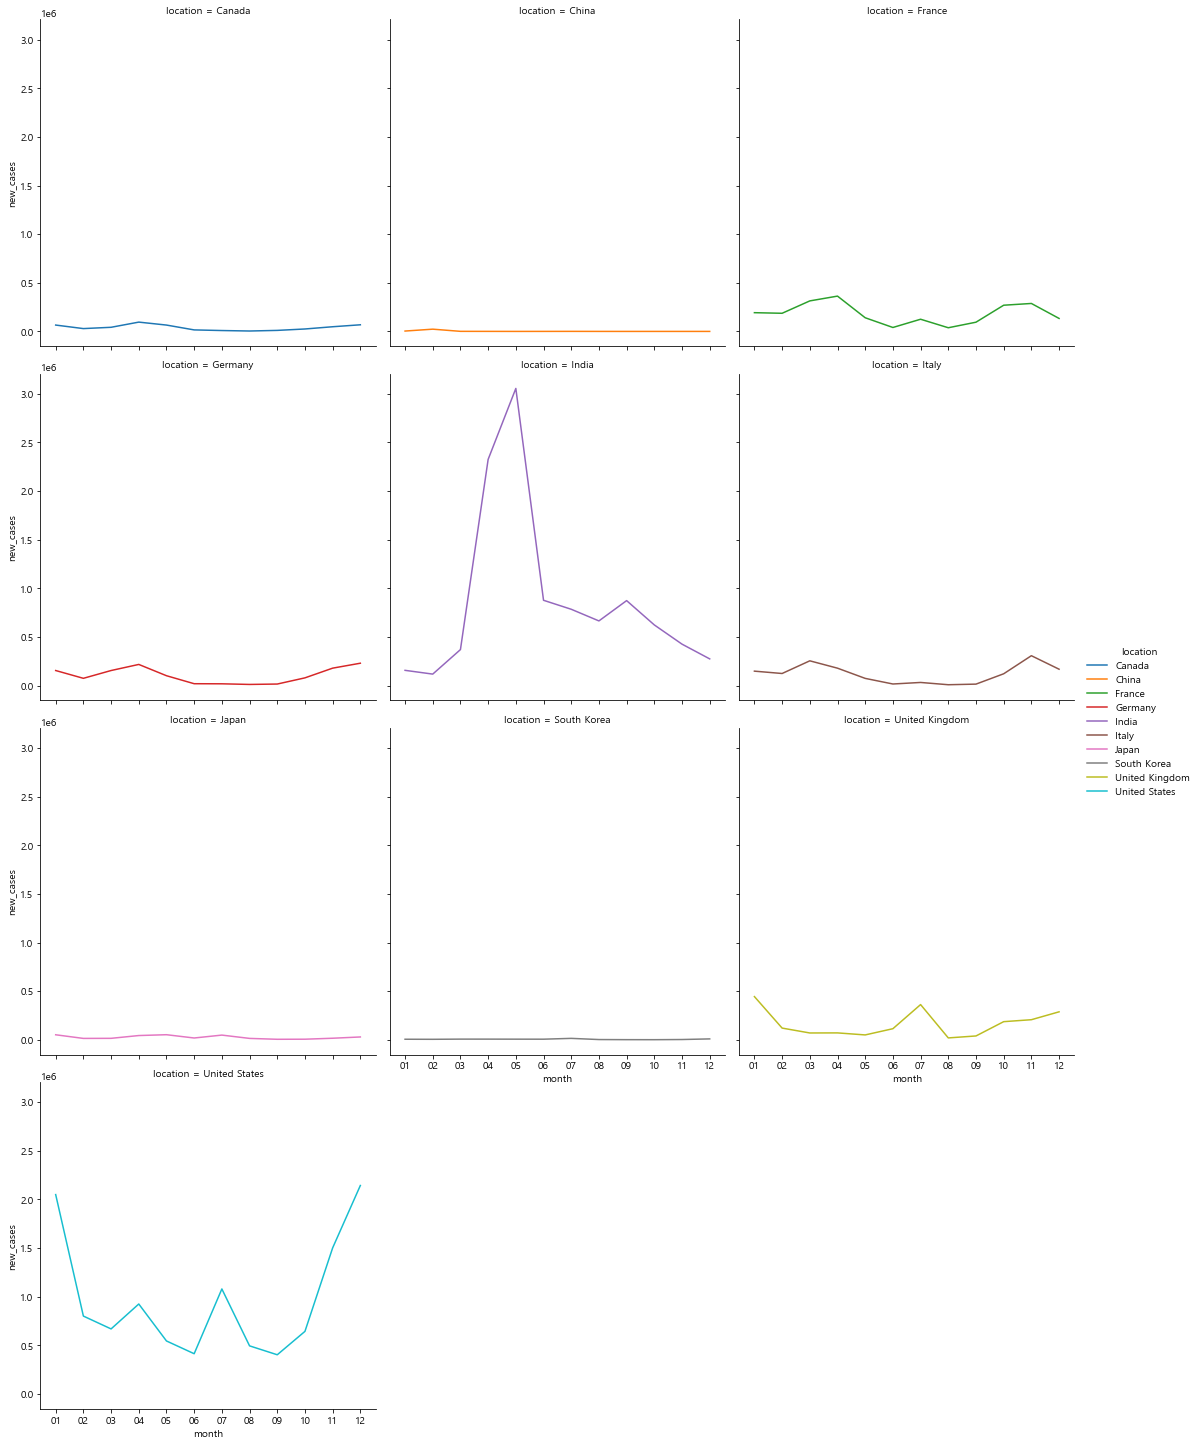

In [31]:
sns.relplot(data=df, x="month", y="new_cases",hue="location", kind="line", col="location", col_wrap=3, ci=None)

## <정리>

#### - 최종 분석

전세계 신규 확진자가 대폭 증가하는 구간을 전후로 항공여객 편수가 급격하게 하락하고, 항공화물 물동량이 소폭 증가하는 것을 볼 수있었다.<br>
COVID-19로 인한 국내외 이동이 제한되면서, 항공산업은 지대한 영향을 받았지만, 사람들이 집에 머무는 시간이 많아지면서 오히려 소비가 증가함에 따라 항공화물 물동량이 증가 하는 것을 확인 할 수 있었다.<br>

#### - 느낀점

데이터를 전처리하는 부분에서 생각보다 많은 시간을 소요해서 기존에 기획했던 것보다 분석을 다양하게 시도해보지 못한 점이 아쉬웠다.<br>
그래도 전처리 과정을 통해 이전에 헷갈렸던 groupby와 agg 함수 사용법, concat 사용법 등을 확실하게 익힐 수 있었다. <br>
또한 시각화를 위해 altair, plotly 패키지 등 인터렉티브한 대화형 시각화 자료를 구현하고 싶어서 예시 코드를 변형하는 방식으로 도전해봤었는데 짧은 시간내에 사용법을 익히는 것은 불가능했고 결국 matplotlib와 seaborn으로 시각화를 하게 되었다. <br>
이후에 현재 데이터를 가지고 좀 더 다양한 분석을 할 때 다시 한번 도전해봐도 좋을 것 같다.<br>
현재 온라인으로 수업을 진행하면서 팀원들과 프로젝트를 진행할 때 소통의 어려움이 있을 줄 알았는데 모두 적극적으로 참여하며 업무 분담이 잘 된 것 같아 만족스러운 프로젝트 경험이었다. 